In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime 

In [2]:
!pip install yfinance

In [7]:
import yfinance as yf
start='2010-01-01'
today_date = datetime.date.today()
end = today_date.strftime('%Y-%m-%d')
df = yf.download('AAPL', start, end)

# Display the first few rows of the data
print(df.tail())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-22  165.520004  167.259995  164.770004  165.839996  165.839996   
2024-04-23  165.350006  167.050003  164.919998  166.899994  166.899994   
2024-04-24  166.539993  169.300003  166.210007  169.020004  169.020004   
2024-04-25  169.529999  170.610001  168.149994  169.889999  169.889999   
2024-04-26  169.880005  171.339996  169.179993  169.300003  169.300003   

              Volume  
Date                  
2024-04-22  48116400  
2024-04-23  49537800  
2024-04-24  48251800  
2024-04-25  50558300  
2024-04-26  44525100  


           Date        Open        High         Low       Close   Adj Close  \
3598 2024-04-22  165.520004  167.259995  164.770004  165.839996  165.839996   
3599 2024-04-23  165.350006  167.050003  164.919998  166.899994  166.899994   
3600 2024-04-24  166.539993  169.300003  166.210007  169.020004  169.020004   
3601 2024-04-25  169.529999  170.610001  168.149994  169.889999  169.889999   
3602 2024-04-26  169.880005  171.339996  169.179993  169.300003  169.300003   

        Volume  
3598  48116400  
3599  49537800  
3600  48251800  
3601  50558300  
3602  44525100  


,index,Open,High,Low,Close,Volume
0,0,7.622500,7.660714,7.585000,7.643214,493729600
1,1,7.664286,7.699643,7.616071,7.656429,601904800
2,2,7.656429,7.686786,7.526786,7.534643,552160000
3,3,7.562500,7.571429,7.466071,7.520714,477131200
4,4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...,...
3598,3598,165.520004,167.259995,164.770004,165.839996,48116400
3599,3599,165.350006,167.050003,164.919998,166.899994,49537800
3600,3600,166.539993,169.300003,166.210007,169.020004,48251800
3601,3601,169.529999,170.610001,168.149994,169.889999,50558300


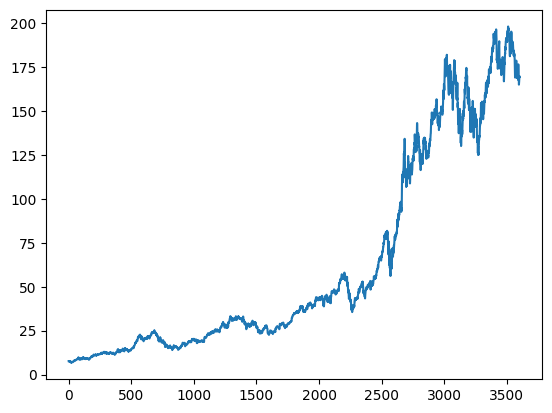

In [9]:
# Display the last few rows of the data
print(df.tail())
df = df.reset_index()
df.head()
df = df.drop(['Date', 'Adj Close'], axis = 1)    #ye chnage
df.head()
plt.plot(df.Close)
df

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3598    182.5990
3599    182.3640
3600    182.1605
3601    181.9599
3602    181.7405
Name: Close, Length: 3603, dtype: float64


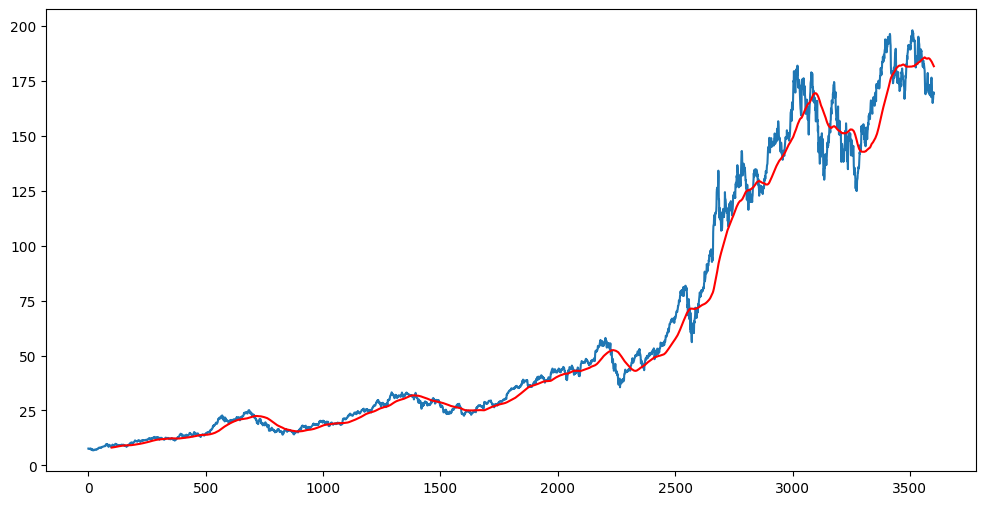

In [10]:
ma100 = df.Close.rolling(100).mean()
print(ma100)
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

(3603, 6)

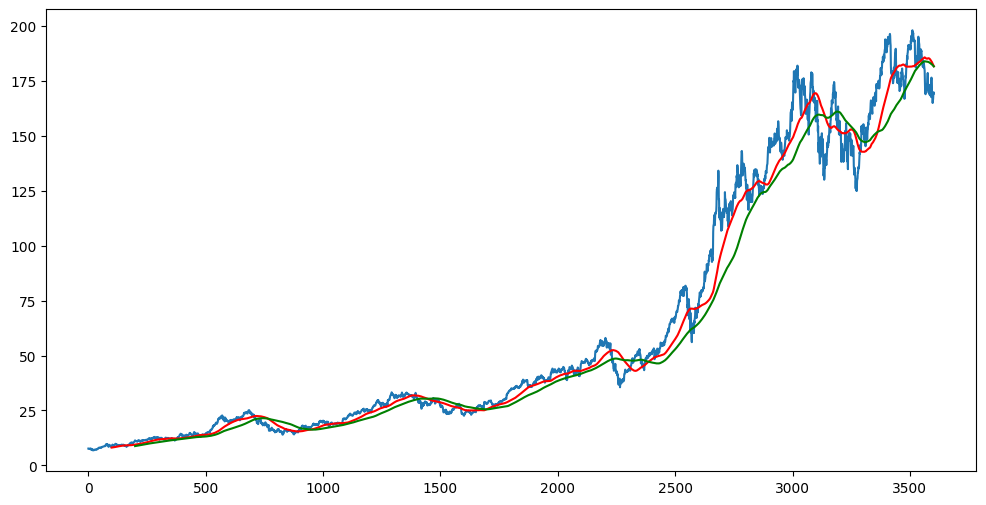

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
df.shape

In [13]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int (len(df))])

print(data_training.shape)
print(data_testing.shape)

(2522, 1)
(1081, 1)


In [14]:
data_training.head()
data_testing.head()

,Close
2522,77.582497
2523,79.239998
2524,78.169998
2525,77.834999
2526,78.809998


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array


array([[0.01111695],
       [0.01130426],
       [0.009578  ],
       ...,
       [0.96016932],
       [0.97717883],
       [1.        ]])

In [16]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
#ML model
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50 ,activation= 'relu' , return_sequences= True , input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 ,activation= 'relu' , return_sequences= True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 ,activation= 'relu' , return_sequences= True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 ,activation= 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\jeeva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer= 'adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 0.0470
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0050
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0045
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0040
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0034
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0035
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0032
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0029
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0027
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0027
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0026
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0029
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0027
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0029
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0027
Epoc

In [30]:
model.save(\Users\jeeva\Documents\Mini&major\Keras_model2.h5)

SyntaxError: invalid syntax (3020334596.py, line 1)

In [41]:
data_testing.head()

,Adj Close
2494,65.007919
2495,64.256294
2496,63.110596
2497,63.667629
2498,64.601715


In [43]:
data_training.tail()

,Adj Close
2489,63.733307
2490,63.677361
2491,64.793861
2492,64.287910
2493,65.151436


In [44]:
past_100_days = data_training.tail(100)

In [49]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [50]:
final_df.head()

,Adj Close
0,49.100677
1,48.743111
2,49.117596
3,49.579067
4,49.407513


In [51]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01580873],
       [0.01344303],
       [0.01592066],
       ...,
       [0.89925307],
       [0.89124754],
       [0.88681476]])

In [52]:
input_data.shape

(1169, 1)

In [53]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100: i])
    y_test.append(input_data[i, 0])

In [54]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1069, 100, 1)
(1069,)


In [55]:
#Making Predictions
y_predicted = model.predict(x_test)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [56]:
y_predicted.shape

(1069, 1)

In [57]:
y_test

array([0.12105275, 0.11607992, 0.10849985, ..., 0.89925307, 0.89124754,
       0.88681476])

In [58]:
y_predicted

array([[0.1669487 ],
       [0.16825555],
       [0.16944015],
       ...,
       [0.86902916],
       [0.8667997 ],
       [0.86513674]], dtype=float32)

In [59]:
scaler.scale_

array([0.00661611])

In [60]:
scale_factor = 1/0.00661611
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

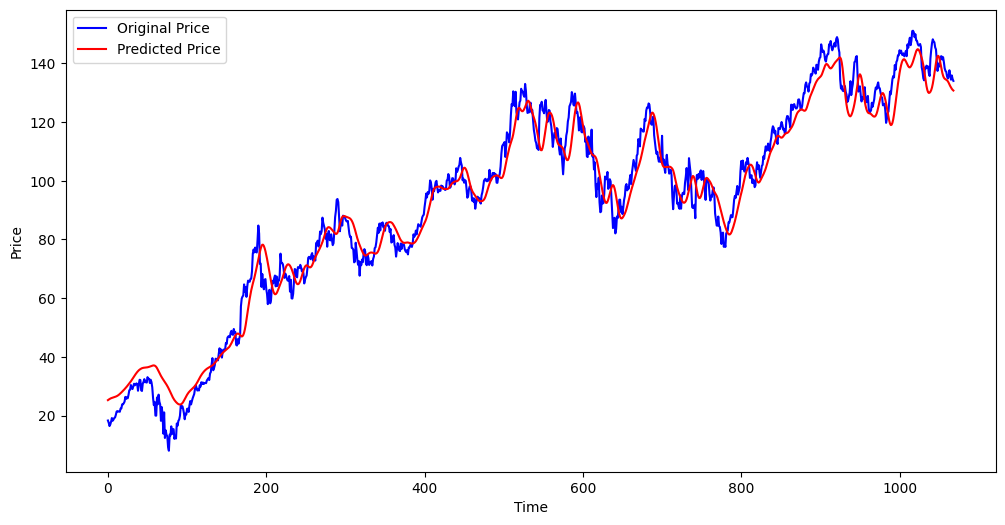

In [61]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()